# Physical Adjacency
In this report we look at how physical adjaceny between ROI pairs and its effect on connectivity inferred by MANIA.
We define three categories od connections:
 - Connected and adjacent ROI pair (Category **AC**)
 - Connected but not adjacent ROI pair (Category **A'C**)
 - Not Connected but adjacent ROI pair (Category **AC'**)

> We look at the ratios of above category of ROI pairs among six subjects in both hemisphere to see what percentage of connections in MANIA are from not adjacent ROI pairs or what percentage of adjacent ROIs are not connected by MANIA

###### All results in percentage (per subject per hemisphere) are printed below. Moreover the pie charts show the fractions of each category in the pool of ROI pairs defined by **AC+A'C+AC'**  i.e. ROI pairs which are either connected or adjacent

In [1]:
query = '''match (n:ROI)-[r]->(m:ROI)
where r.border>1 or r.connected=1
return n.label as r1,m.label as r2,n.hemisphere as h1,m.hemisphere as h2,r.SUBJECT as sub,collect(distinct r.connected) as con,max(r.border) as bor'''

In [3]:
from py2neo import Node, Relationship, Graph
from numpy.random import rand
import numpy as num
from bokeh.plotting import output_notebook,figure, show
from bokeh.layouts import row,column,gridplot
from bokeh.models import Label
import numpy as np
import matplotlib.pyplot as plt
from curve import *
from bokeh.models import Span
output_notebook()
graph = Graph(password='1234')

Loading BokehJS ...

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
A = graph.run(query)

In [6]:
D = {}
for i,w in enumerate(A):
    ad = False
    edge = False
    sub = w["sub"]
    h1 = w['h1']
    h2 = w['h2']
    bor = w['bor']
    con = w['con']
    try:
        D[sub]
    except KeyError:
        D[sub] = {}
    try:
        D[sub][h1+h2]
    except KeyError:
        D[sub][h1+h2]={0:0,1:0,2:0}
    if bor:
        if bor>1:
            ad = True
    if len(con)>0:
        edge = True
    if ad and edge:
        D[sub][h1+h2][0] = D[sub][h1+h2][0] + 1 # adjacent connected
    elif ad and not edge:
        D[sub][h1+h2][1] = D[sub][h1+h2][1] + 1 # adjacent not connected
    elif not ad and edge:
        D[sub][h1+h2][2] = D[sub][h1+h2][2] + 1 # connected not adjacnet
    else:
        pass

ZeroDivisionError: float division by zero

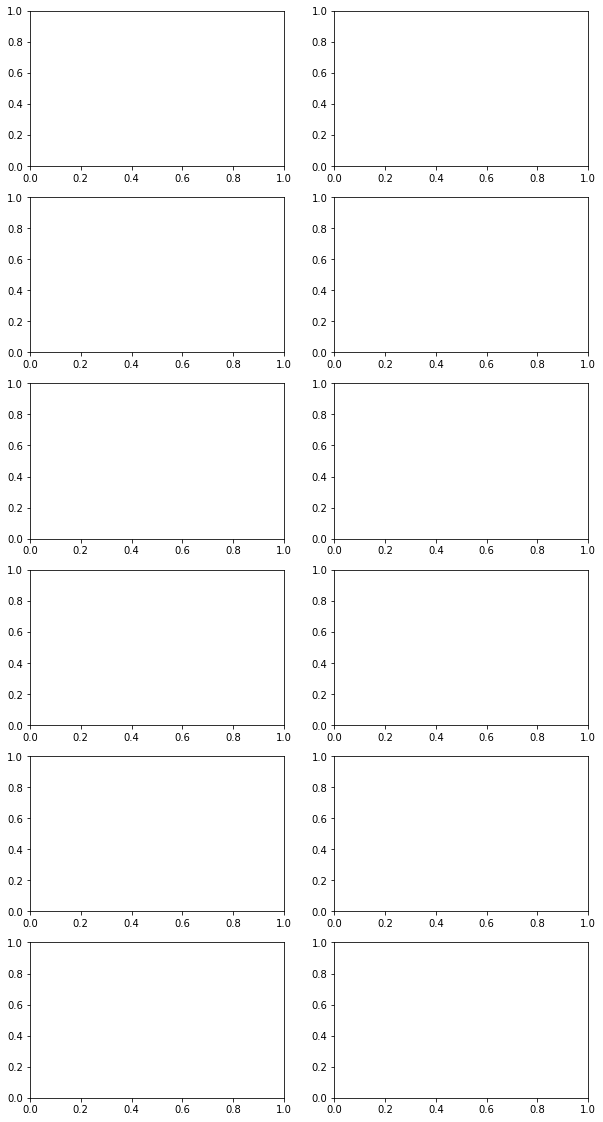

In [7]:
labels = "AC", "AC'", "A'C"
fig, ax = plt.subplots(6,2,figsize=(10,20))
for i,sub in enumerate(D.keys()):
    for he in D[sub].keys():
        hem = he[0]
        if hem == 'R':
            j = 0
        else:
            j = 1
        sizes = [D[sub][he][0], D[sub][he][1], D[sub][he][2]]
        ratio1 = 100*float(sizes[1])/(sizes[0]+sizes[1])
        ratio2 = 100*float(sizes[2])/(sizes[0]+sizes[2])
        st = 'Subject:'+str(sub)+' hemisphere:' + hem
        print(st)
        print("AC'/(AC+AC'):"+str(num.ceil(ratio1)))
        print("A'C/(AC+A'C)"+str(num.ceil(ratio2)))
        print('-----------------')
        #print(sizes)
        ax[i,j].axis('equal')
        ax[i,j].pie(sizes,labels=labels,explode = [0,.4,.1])
        ax[i,j].set_title(st)
        #ax[i,2] = ax[i,3].text(3, 8,"dsfsdfsf")
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.show()